In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math
import pprint
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})

### Train-Test Spliting of the Data

In [2]:
data = pd.read_csv('../data/teams_normalized.csv')

# separating the dataset into section ready for model fitting
train, test = train_test_split(data, test_size=0.15, train_size=0.85)
x_cols = ['Age', 'Pace_Norm', '3PAr_Norm', 'TS%_Norm', 'eFG%_Norm', 'TOV%_Norm', 'ORB%_Norm', 'FT/FGA_Norm', 'OeFG%_Norm', 'OTOV%_Norm', 'DRB%_Norm', 'OFT/FGA_Norm']
y_col = 'W'

x_train = train[x_cols]
y_train = train[y_col]
x_test= test[x_cols]
y_test = test[y_col]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(881, 12) (881,) (156, 12) (156,)


Here we define some utilities for each of the models we will use.

In [3]:
def create_model(model_name, model):
  pipeline = Pipeline(
     steps=[('scaler', StandardScaler()), (model_name, model)]
  )
  pipeline.fit(x_train, y_train)
  print("model trained and created")
  return pipeline

def score_model(model):
  y_pred = model.predict(x_test)
  print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))
  print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2)) 
  print("Root mean squared error =", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

def unpack_model(model_name, model):
  estimator = model.named_steps[model_name]
  d = dict(zip(x_cols, estimator.coef_))
  print('Feature Importances')
  for key, value in d.items():
    print(key + ":", round(value, 2))
  print("Intercept: ", estimator.intercept_)
  sns.barplot(x=list(d.keys()), y=list(d.values()))

def save_model(model, filename):
  with open("../models/linear_models/" + filename + ".pickle", "wb") as f:
    pickle.dump(model, f)
  print('Model saved as ' + filename + '.pickle')

### Linear Regression
We can now run the linear regression algorithm on the split data.

In [4]:
linear_regression = create_model('lr', linear_model.LinearRegression())

model trained and created


#### Scoring the Linear Regression Model

In [5]:
score_model(linear_regression)

R2 score = 0.93
Mean absolute error = 2.54
Root mean squared error = 3.27


#### Unpacking the Linear Regression Model

Feature Importances
Age: 0.81
Pace_Norm: 0.03
3PAr_Norm: 0.23
TS%_Norm: 6.55
eFG%_Norm: 0.61
TOV%_Norm: -3.35
ORB%_Norm: 2.99
FT/FGA_Norm: 0.04
OeFG%_Norm: -5.87
OTOV%_Norm: 3.38
DRB%_Norm: 1.45
OFT/FGA_Norm: -2.07
Intercept:  40.87854710556185


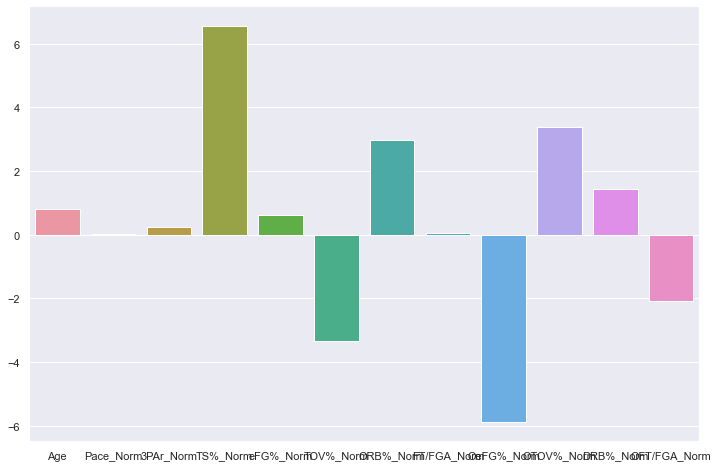

In [6]:
unpack_model('lr', linear_regression)

While this model is quite accurate, some of the coeficients have really high values, which is a symptom of over fitting. The liner regression model is trying to match the results too acurately, that the algorithm is too data specific.

#### Saving the Linear Regression Model

In [7]:
save_model(linear_regression, 'linear_regression')

Model saved as linear_regression.pickle


### Ridge Model
Since the Linear model has some extremely high coeficient values, we can now use the Ridge model to remedy the overfitting.  

In [8]:
ridge = create_model('ridge', linear_model.Ridge(alpha=0.5))

model trained and created


#### Scoring the Ridge Regression Model

In [9]:
score_model(ridge)

R2 score = 0.93
Mean absolute error = 2.54
Root mean squared error = 3.27


#### Unpacking the Ridge Model

Feature Importances
Age: 0.81
Pace_Norm: 0.03
3PAr_Norm: 0.23
TS%_Norm: 6.32
eFG%_Norm: 0.82
TOV%_Norm: -3.36
ORB%_Norm: 2.98
FT/FGA_Norm: 0.11
OeFG%_Norm: -5.86
OTOV%_Norm: 3.37
DRB%_Norm: 1.45
OFT/FGA_Norm: -2.06
Intercept:  40.87854710556186


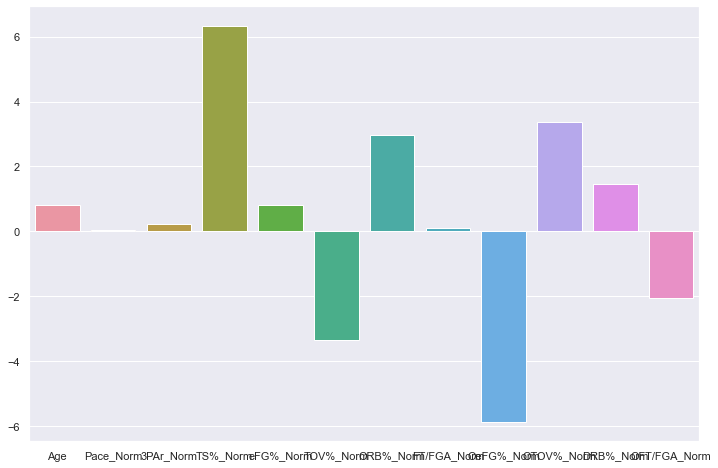

In [10]:
unpack_model('ridge', ridge)

These coefficients are all much more reasonable in magnitude as compared to the prior regression model

#### Saving the Ridge Model

In [11]:
save_model(ridge, 'ridge')

Model saved as ridge.pickle


### The Lasso Model
Since this data has many columns, we might want the ability to wittle down the effective columns and for this we employ the lasso model.

In [12]:
lasso = create_model('lasso', linear_model.Lasso(alpha=0.1))

model trained and created


#### Scoring the Lasso Model

In [13]:
score_model(lasso)

R2 score = 0.93
Mean absolute error = 2.54
Root mean squared error = 3.29


#### Unpacking the Lasso Model

Feature Importances
Age: 0.8
Pace_Norm: -0.0
3PAr_Norm: 0.13
TS%_Norm: 6.56
eFG%_Norm: 0.58
TOV%_Norm: -3.28
ORB%_Norm: 2.86
FT/FGA_Norm: 0.0
OeFG%_Norm: -5.81
OTOV%_Norm: 3.19
DRB%_Norm: 1.35
OFT/FGA_Norm: -1.92
Intercept:  40.87854710556185


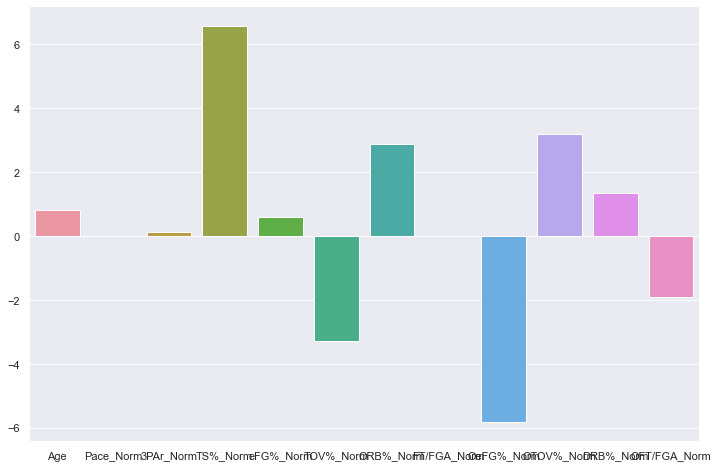

In [14]:
unpack_model('lasso', lasso)

This model has allowed us to zero in some of the more influential factors.

#### Saving the Lasso Model

In [15]:
save_model(lasso, 'lasso')

Model saved as lasso.pickle


### Combining Concepts: the Elastic Model
These models all have their own strengths and weaknesses, so there is also the elastic model that combines the idea of restricting coefficient values, as well as setting as many to zero as possible.

In [16]:
elastic = create_model('elastic', linear_model.ElasticNet(alpha=0.1, l1_ratio=0.7))

model trained and created


#### Scoring the Elastic Model

In [17]:
score_model(elastic)

R2 score = 0.92
Mean absolute error = 2.59
Root mean squared error = 3.32


#### Unpacking the Elastic Model

Feature Importances
Age: 0.93
Pace_Norm: -0.0
3PAr_Norm: 0.14
TS%_Norm: 4.07
eFG%_Norm: 2.77
TOV%_Norm: -3.24
ORB%_Norm: 2.73
FT/FGA_Norm: 0.63
OeFG%_Norm: -5.6
OTOV%_Norm: 3.07
DRB%_Norm: 1.39
OFT/FGA_Norm: -1.88
Intercept:  40.87854710556187


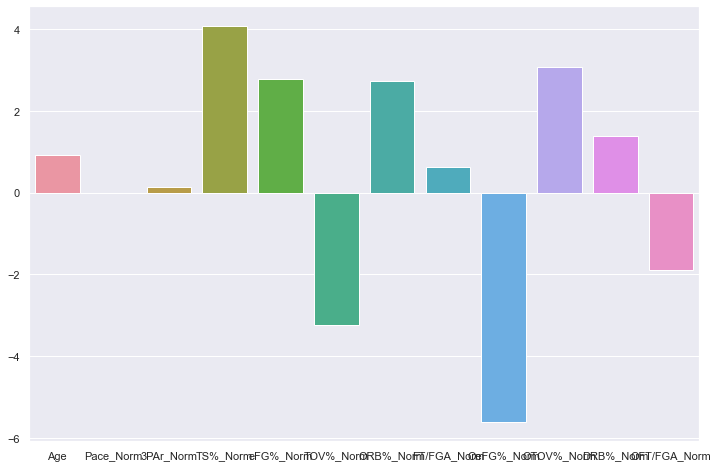

In [18]:
unpack_model('elastic', elastic)

We have now reached a middle ground between the sparsity of factors and the interpretable coefficients with this model.

#### Saving the Elastic Model

In [19]:
save_model(elastic, 'elastic')

Model saved as elastic.pickle


### A Different Type of Linear Regression
#### Bayesian Regression
With this method, we can obtain the number of wins in a distrobution, instead of simply obtain one exact number. We can also use the same charecteristic of the Ridge model to lessen the effect of overfitting. 

In [20]:
bayesian_ridge = create_model('bayesian_ridge', linear_model.BayesianRidge())

model trained and created


#### Scoring the Ridge Bayesian Model

In [21]:
score_model(bayesian_ridge)

R2 score = 0.93
Mean absolute error = 2.54
Root mean squared error = 3.27


#### Unpacking the Ridge Bayesian Model

Feature Importances
Age: 0.82
Pace_Norm: 0.03
3PAr_Norm: 0.23
TS%_Norm: 6.1
eFG%_Norm: 1.02
TOV%_Norm: -3.36
ORB%_Norm: 2.97
FT/FGA_Norm: 0.17
OeFG%_Norm: -5.85
OTOV%_Norm: 3.37
DRB%_Norm: 1.45
OFT/FGA_Norm: -2.06
Intercept:  40.87854710556186
Alpha:  0.10165061717977156
Lambda:  0.10663898233459994


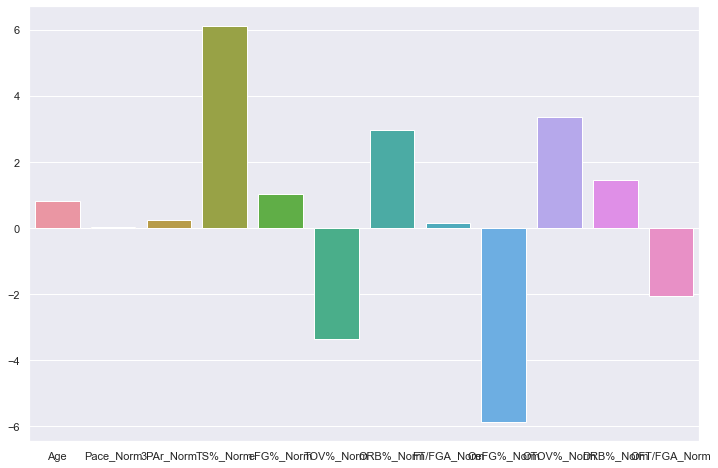

In [22]:
unpack_model('bayesian_ridge', bayesian_ridge)
br = bayesian_ridge.named_steps['bayesian_ridge']
print('Alpha: ', br.alpha_)
print('Lambda: ', br.lambda_)

These numbers are representative of the normal distrobution that the model gives.

#### Saving the Ridge Bayesian Model

In [23]:
save_model(bayesian_ridge, 'bayesian_ridge')

Model saved as bayesian_ridge.pickle


In [24]:
predicted_b_r = data

predicted_b_r['PREDICTED_W'], predicted_b_r['W_SIGMA'] = bayesian_ridge.predict(
  predicted_b_r[x_cols], return_std=True)

predicted_b_r['DELTA'] = predicted_b_r['W'] - predicted_b_r['PREDICTED_W']

predicted_b_r.to_csv('../data/predicted_b_r_team.csv')

<class 'numpy.ndarray'>


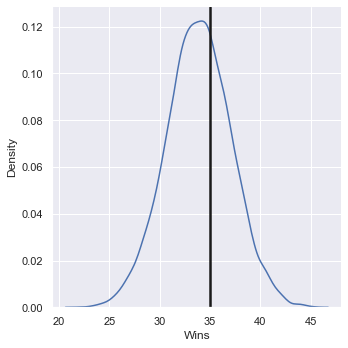

In [25]:
#  100 linearly spaced numbers
x = np.linspace(0,82,5000000)
print(type(x))

# the function, which is y = x^2 here
mu = 33.9
sigma = 3.26

dis = np.random.normal(loc=mu, scale=sigma, size=10000)
data = pd.DataFrame(dis, columns=['Wins'])


sns.displot(data, x='Wins', kind='kde')
plt.axvline(x=35, c='k', ls='-', lw=2.5)